# 1000 чертей

In [2]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
import scipy
import numpy as np
import random
import sklearn
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, OPTICS, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
from scipy.linalg import eigh as sp_eigh
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_multilabel_classification
from sklearn.svm import SVC, OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


# №1 Сгенерируйте случайные процессы WN (везде возьмите 𝒩 (0, 1)), RW, AR(1) для 𝜌 = 0.7 и 𝜌 = −0.3, MA(1) для 𝛼 = 0.2, 𝛼 = 1 и 𝛼 = 2, WN с трендом 𝑦 = 1 − 0.1𝑡 + 𝑊 𝑁 , WN с трендом и аддитивной сезонностью 𝑦 = 1 − 0.1𝑡 + 0.2 sin(𝜋𝑡/6) + 𝑊 𝑁 , WN с трендом и мультипликативной сезонностью 𝑦 = (1 − 0.1𝑡)(1 + 0.2 sin(𝜋𝑡/6)) + 𝑊 𝑁 . Для каждого процесса покажите по 20 траекторий длины 50 — изобразите их разным цветом на общем графике (для каждого процесса свой график — итого 11 графиков).

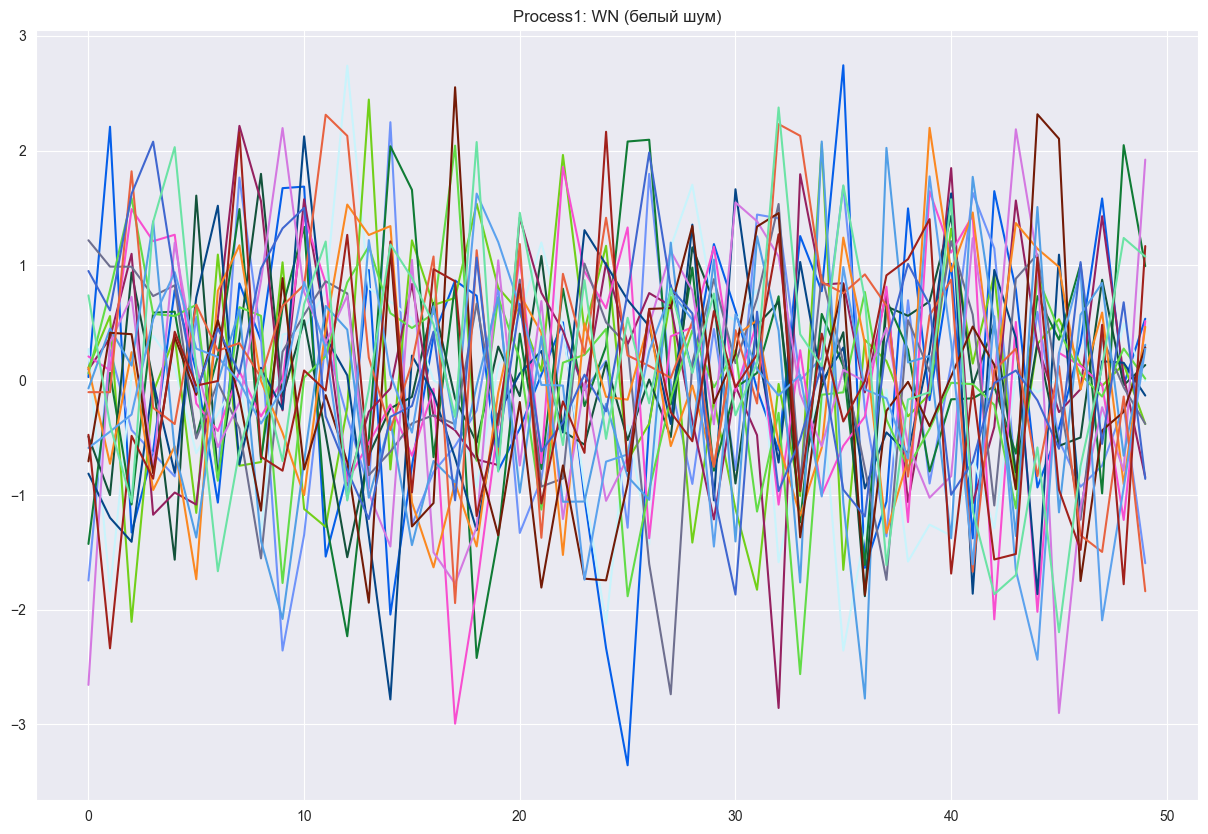

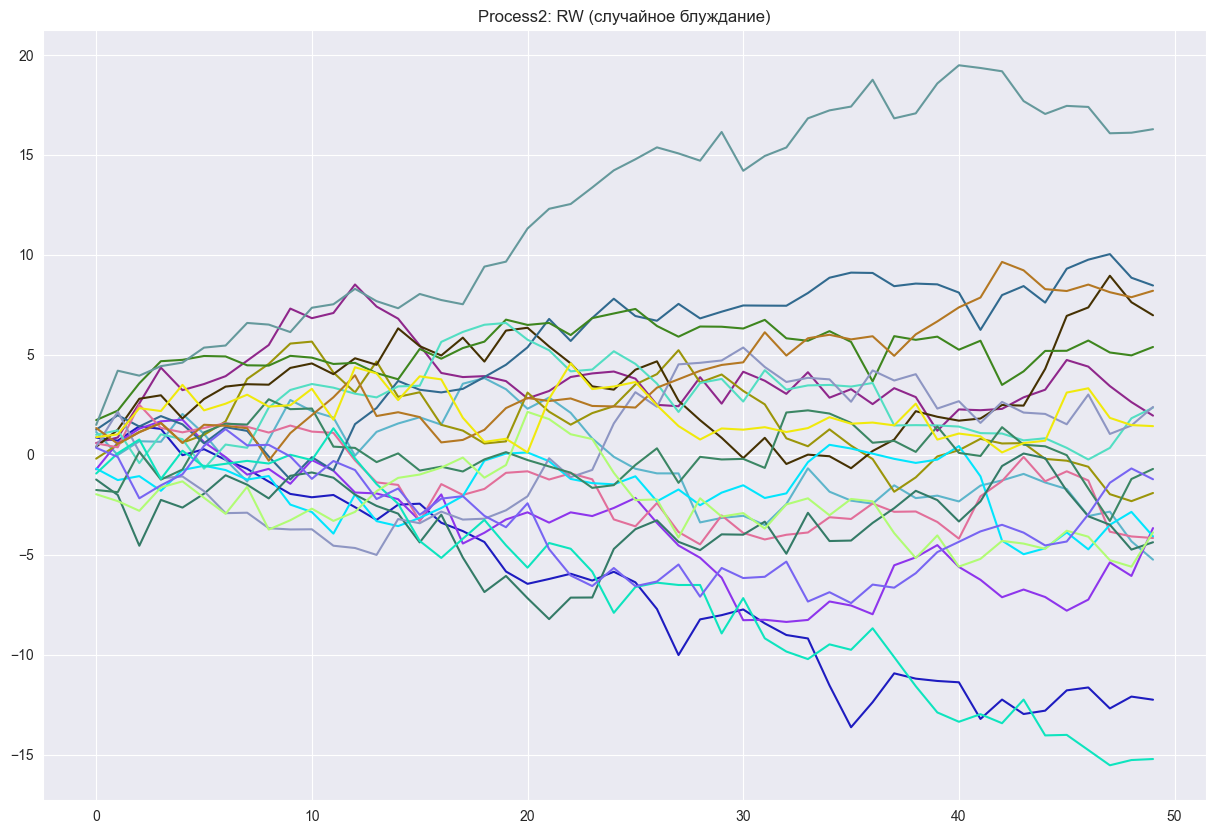

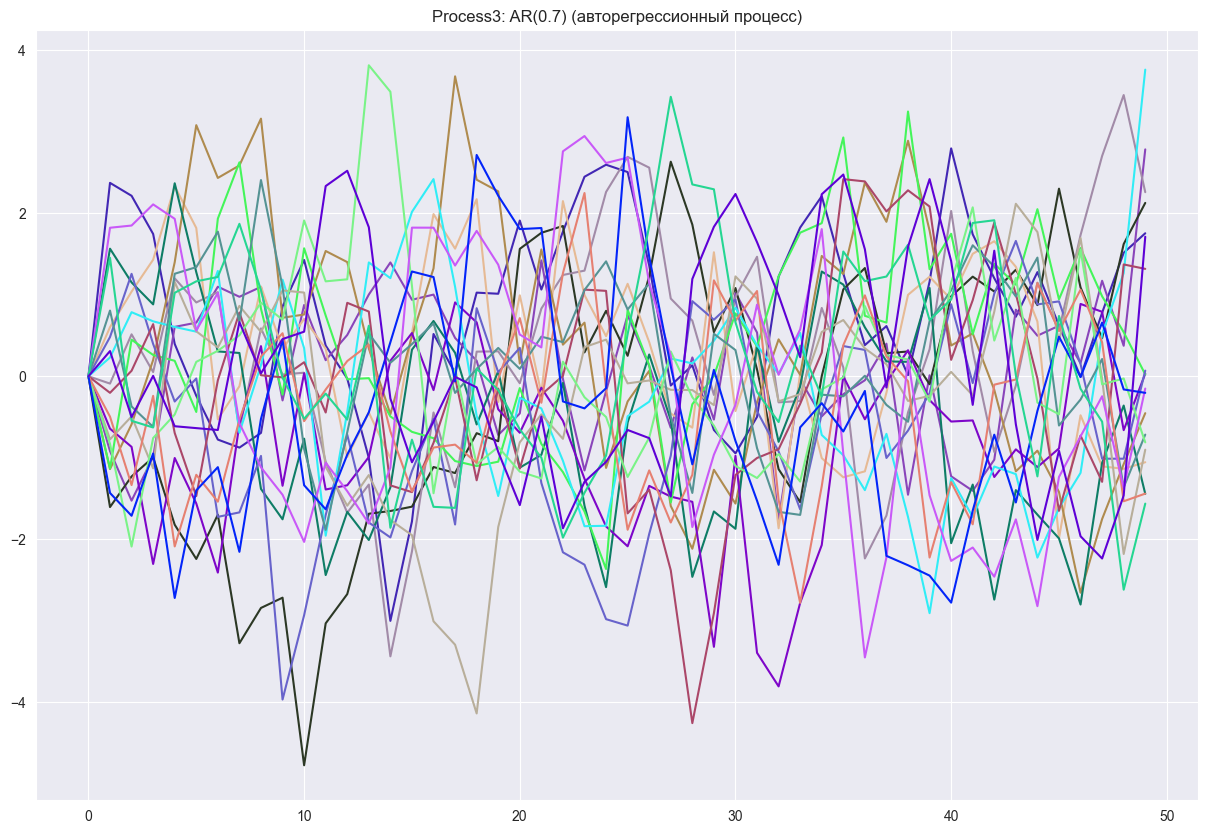

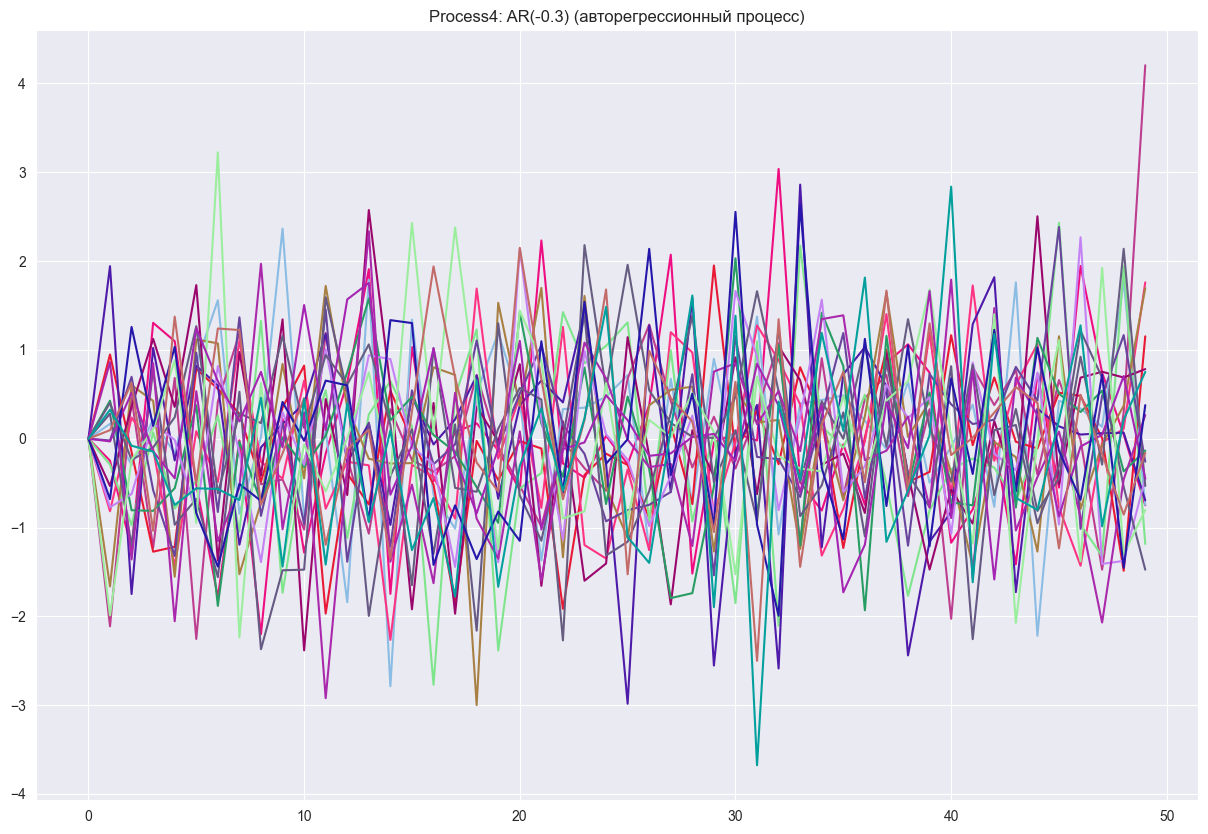

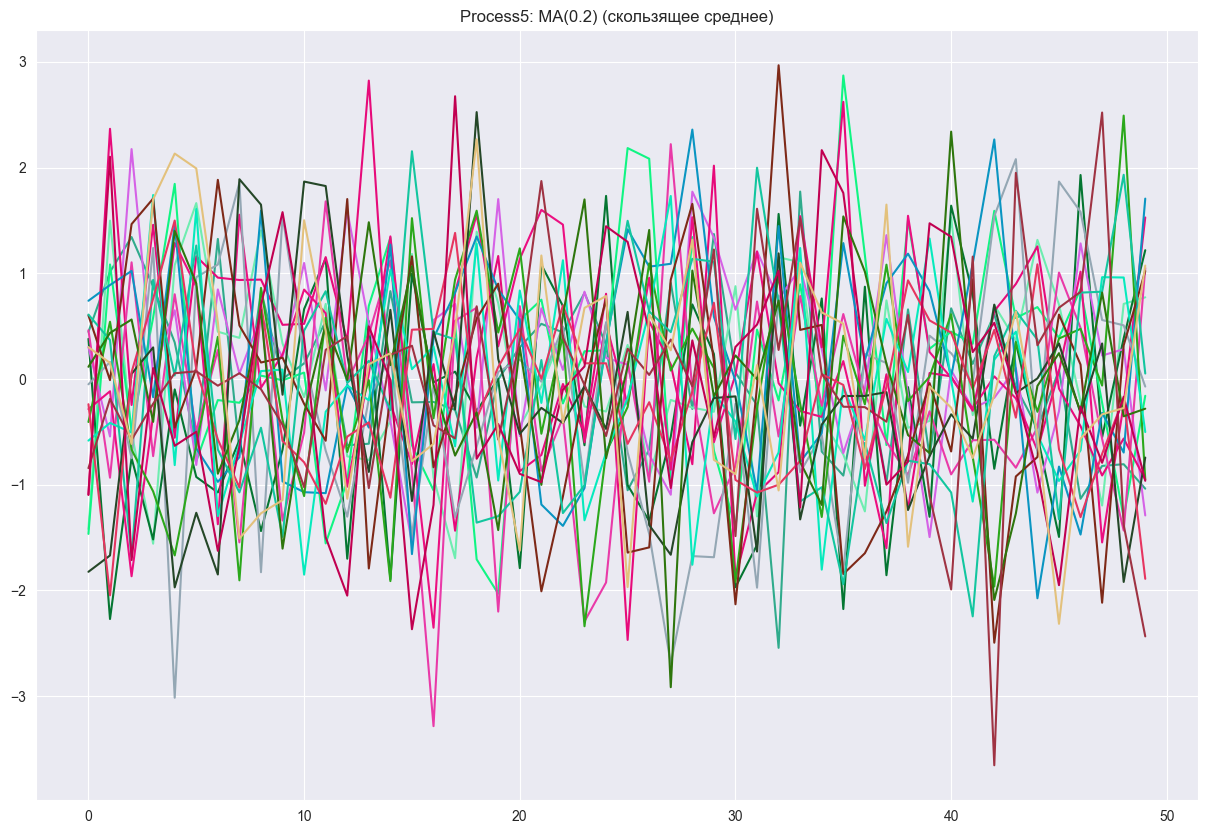

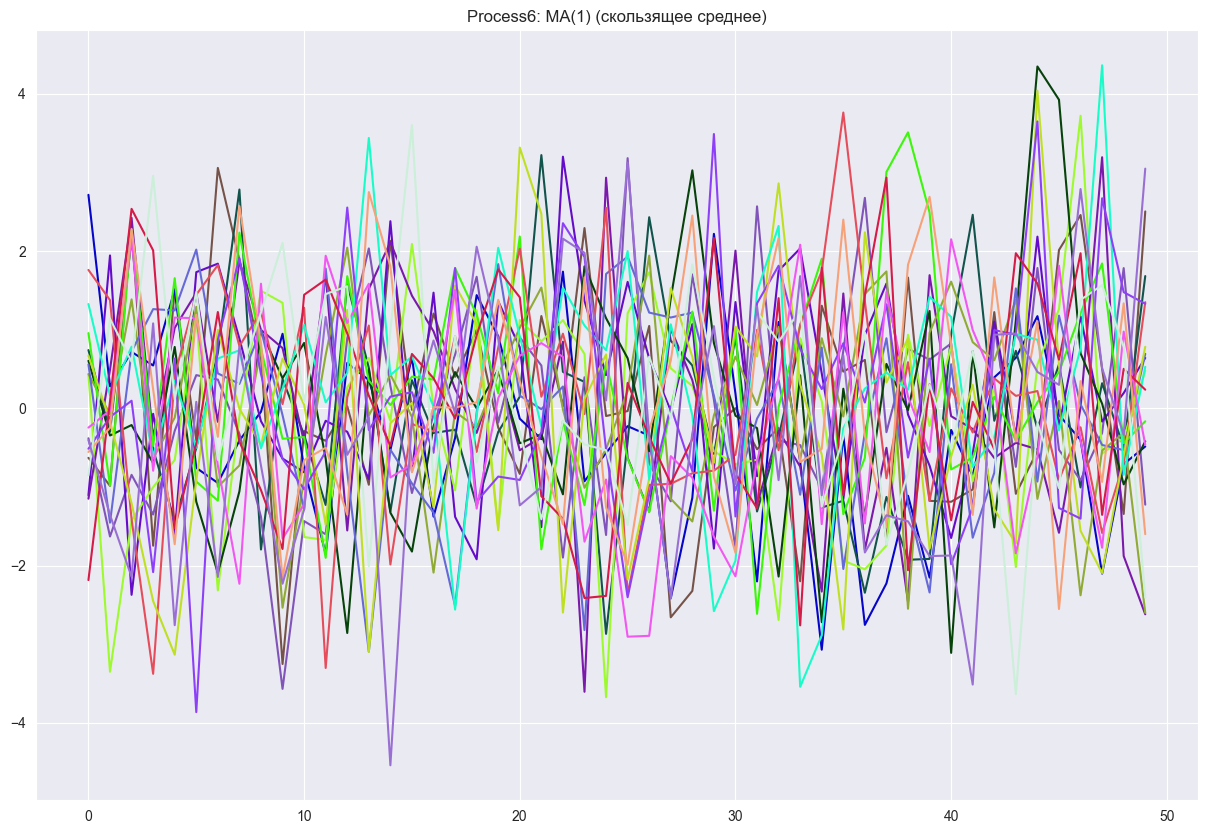

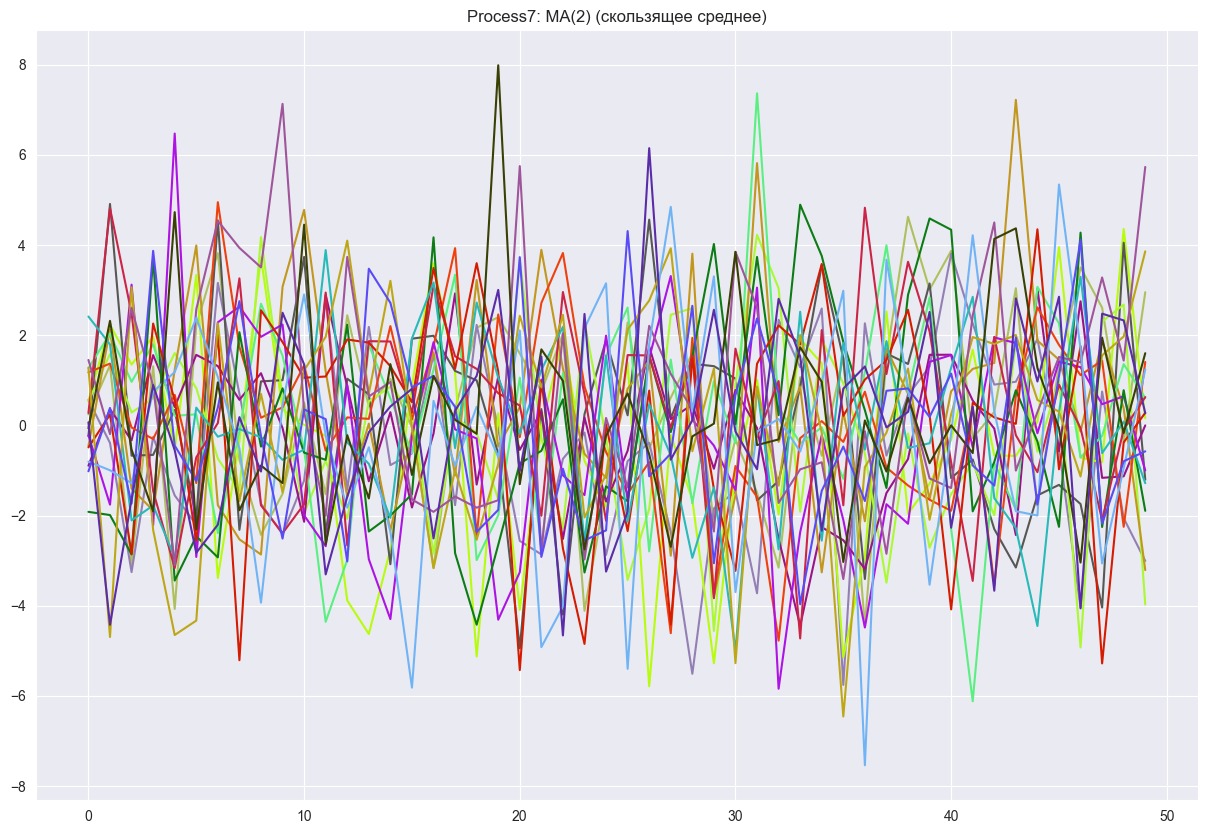

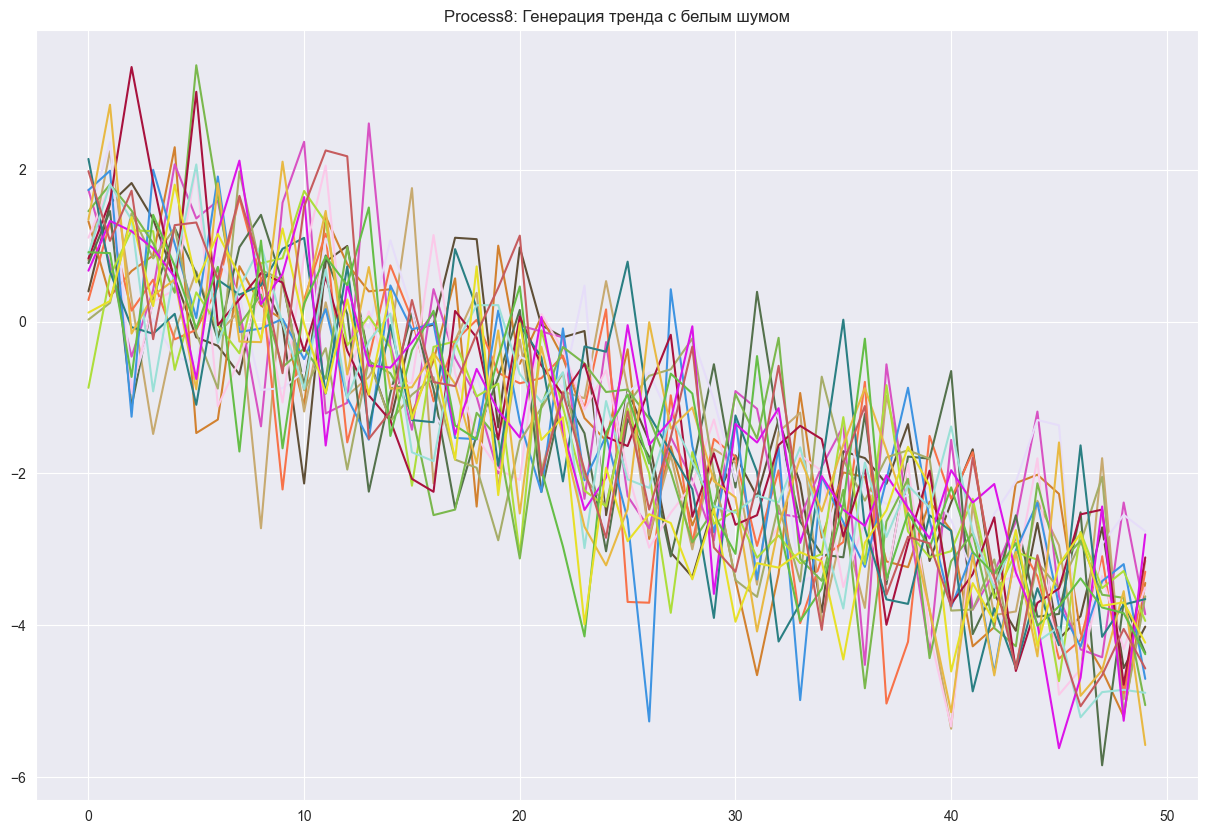

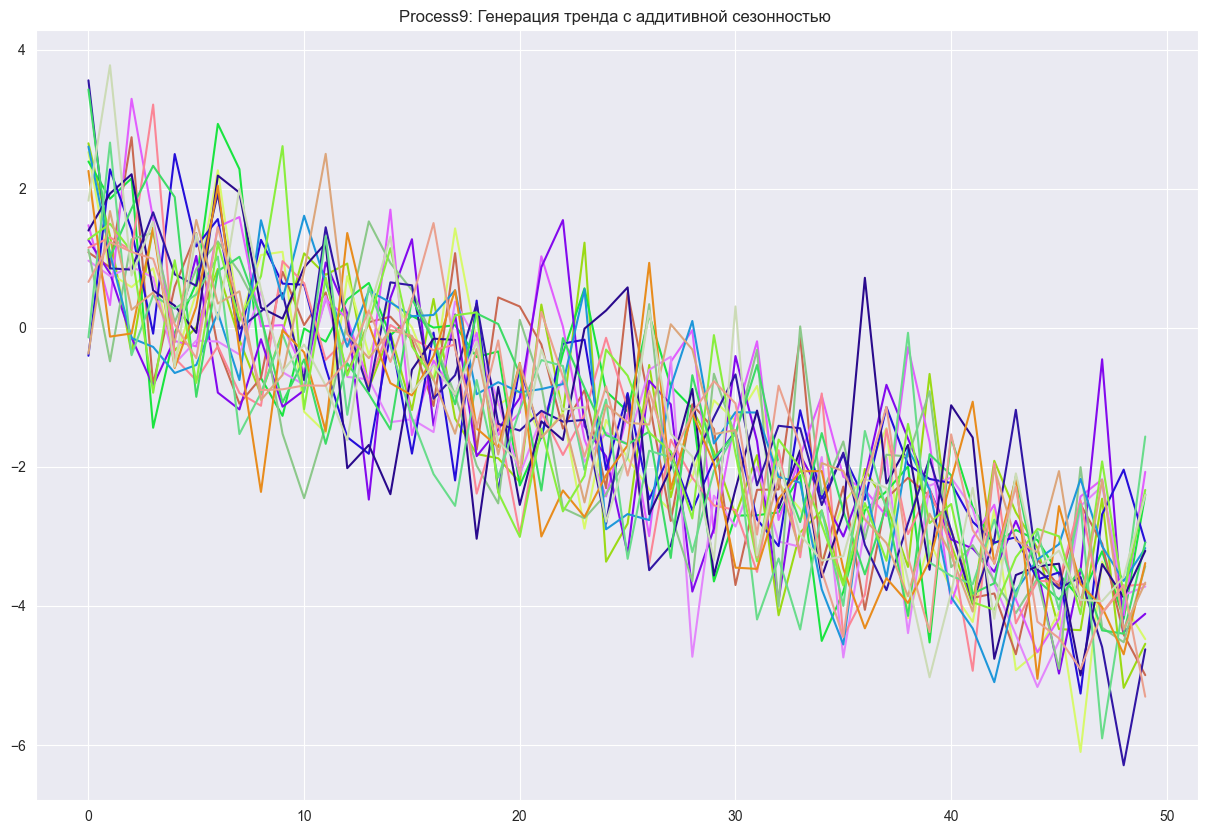

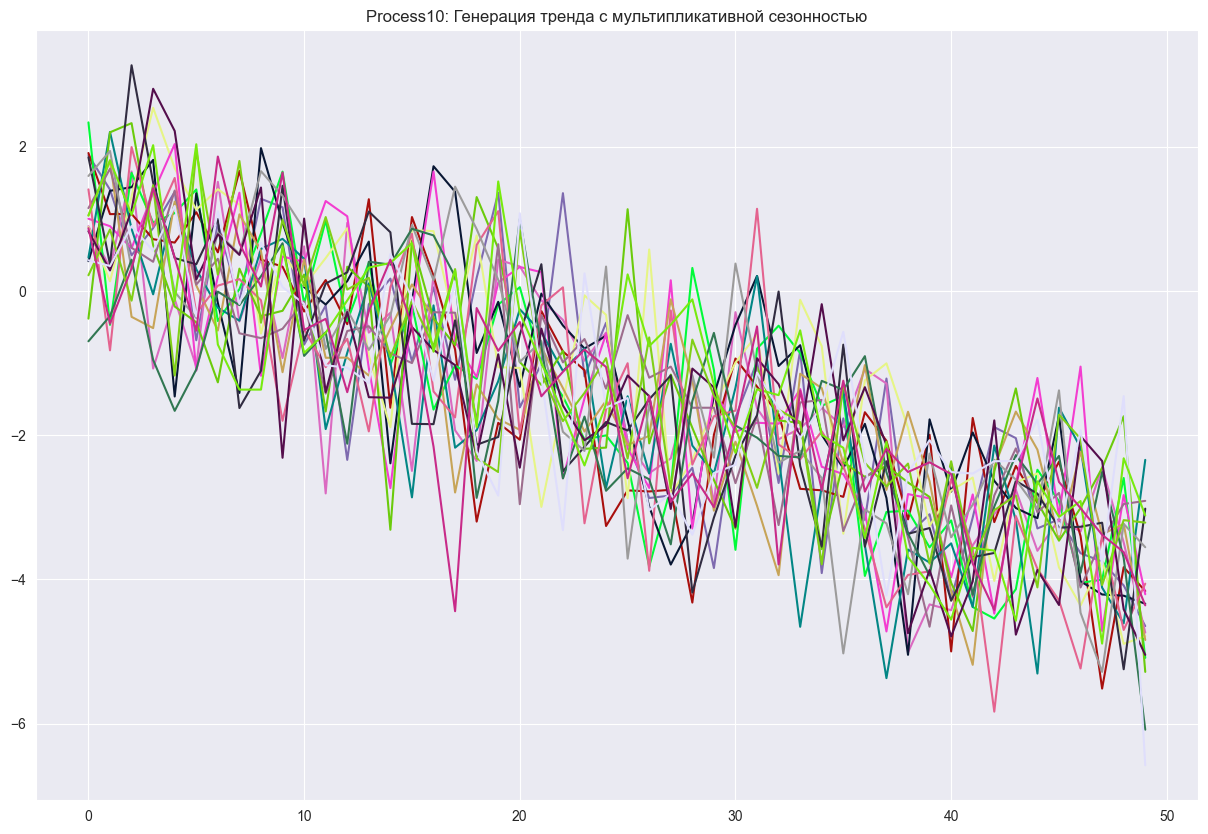

In [19]:
# Генерация случайного процесса WN (белый шум)
def generate_white_noise():
    return np.random.normal(0, 1, 50)

# Генерация случайного процесса RW (случайное блуждание)
def generate_random_walk():
    return np.cumsum(generate_white_noise())

# Генерация случайного процесса AR(1) (авторегрессионный процесс)
def generate_ar1(rho):
    ar = [0]
    for t in range(1, 50):
        ar.append(rho * ar[t-1] + generate_white_noise()[t])
    return np.array(ar)

# Генерация случайного процесса MA(1) (скользящее среднее)
def generate_ma1(alpha):
    ma = [generate_white_noise()[0]]
    for t in range(1, 50):
        ma.append(alpha * generate_white_noise()[t] + generate_white_noise()[t-1])
    return np.array(ma)

# Генерация тренда с белым шумом
def generate_trended_white_noise():
    t = np.arange(50)
    return 1 - 0.1*t + generate_white_noise()

# Генерация тренда с аддитивной сезонностью
def generate_seasonal_white_noise():
    t = np.arange(50)
    return 1 - 0.1*t + 0.2*np.sin(np.pi*t/6) + generate_white_noise()

# Генерация тренда с мультипликативной сезонностью
def generate_seasonal_trended_white_noise():
    t = np.arange(50)
    return (1 - 0.1*t) * (1 + 0.2*np.sin(np.pi*t/6)) + generate_white_noise()

# Генерация и визуализация процессов
processes = [
    generate_white_noise,
    generate_random_walk,
    lambda: generate_ar1(0.7),
    lambda: generate_ar1(-0.3),
    lambda: generate_ma1(0.2),
    lambda: generate_ma1(1),
    lambda: generate_ma1(2),
    generate_trended_white_noise,
    generate_seasonal_white_noise,
    generate_seasonal_trended_white_noise
]
process_name = ['WN (белый шум)', 'RW (случайное блуждание)', 'AR(0.7) (авторегрессионный процесс)', 'AR(-0.3) (авторегрессионный процесс)', 'MA(0.2) (скользящее среднее)', 'MA(1) (скользящее среднее)', 'MA(2) (скользящее среднее)', 'Генерация тренда с белым шумом', 'Генерация тренда с аддитивной сезонностью ', 'Генерация тренда с мультипликативной сезонностью']
for i, process in enumerate(processes):
    plt.figure(figsize=(15, 10), facecolor='white')
    plt.title(f'Process{i+1}: {process_name[i]}')
    # plt.gca().set_facecolor('xkcd:gray')
    for _ in range(20):
        plt.plot(process(), color=np.random.rand(3))
    plt.show()



# №2 Сгенерируйте процесс длины 100 𝑦𝑡 = 1 4𝑦𝑡−2 + 𝑢𝑡 + 𝑢𝑡−1 + 𝑢𝑡−2, где 𝑢𝑡 — WN с 𝜎 = 1. Проверьте его на стационарность с помощью теста Дики–Фуллера. Постройте симуляцию процесса методом 𝐴𝑅𝐼𝑀𝐴(𝑝, 𝑞, 𝑑) — параметры подберите сами (попробуйте ручной подбор и автоматический подбор).

ADF Statistic: -1.20823741384667
p-value: 0.6700421841260729
Critical Values: {'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}


/Library/Python/3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Python/3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Python/3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


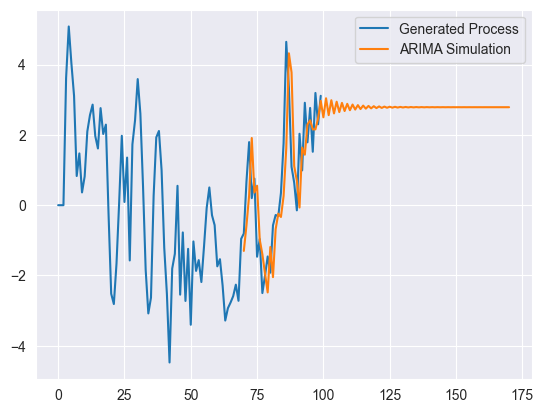

In [61]:
# Генерация процесса
np.random.seed(0)
u = np.random.normal(0, 1, 100)
y = np.zeros(100)
for t in range(3, 100):
    y[t] = 1/4*y[t-2] + u[t] + u[t-1] + u[t-2]

# Проверка на стационарность с помощью теста Дики-Фуллера
result = adfuller(y)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Построение симуляции процесса методом ARIMA
model = ARIMA(y, order=(1, 1, 1))
fit_model = model.fit()
simulated_data = fit_model.predict(start=70, end=170, typ='levels')

# Визуализация сгенерированного процесса и симуляции ARIMA
plt.figure()
plt.plot(y, label='Generated Process')
plt.plot(range(70, 171), simulated_data, label='ARIMA Simulation')
plt.legend()
plt.show()


# №3

In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

import pandas as pd

# Путь к файлу данных
raw_file_path = 'FERTIL3.raw'

# Чтение файла данных, предполагая, что значения разделены пробелами
data = pd.read_csv(raw_file_path, delim_whitespace=True, header=None, names=[
    'gfr', 'pe', 'year', 't', 'tsq', 'pe_1', 'pe_2', 'pe_3', 'pe_4', 'pill', 'ww2', 'tcu',
    'cgfr', 'cpe', 'cpe_1', 'cpe_2', 'cpe_3', 'cpe_4', 'gfr_1', 'cgfr_1', 'cgfr_2', 
    'cgfr_3', 'cgfr_4', 'gfr_2'
])

# Показать начало таблицы для проверки корректности чтения
data.head()


/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_34218/3018038391.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(raw_file_path, delim_whitespace=True, header=None, names=[


gfr     pe  year  t  tsq pe_1 pe_2 pe_3 pe_4  pill  ...  cpe_1  cpe_2  \
0  124.7   0.00  1913  1    1    .    .    .    .     0  ...      .      .   
1  126.6   0.00  1914  2    4    0    .    .    .     0  ...      .      .   
2  125.0   0.00  1915  3    9    0    0    .    .     0  ...      0      .   
3  123.4   0.00  1916  4   16    0    0    0    .     0  ...      0      0   
4  121.0  19.27  1917  5   25    0    0    0    0     0  ...      0      0   

  cpe_3 cpe_4  gfr_1     cgfr_1     cgfr_2    cgfr_3 cgfr_4  gfr_2  
0     .     .      .          .          .         .      .      .  
1     .     .  124.7          .          .         .      .      .  
2     .     .  126.6   1.900002          .         .      .  124.7  
3     .     .    125  -1.599998   1.900002         .      .  126.6  
4     0     .  123.4  -1.599998  -1.599998  1.900002      .    125  

[5 rows x 24 columns]

In [9]:
# Заменить '.' на NaN и преобразовать все колонки к числовому типу данных
data = data.replace('.', pd.NA).apply(pd.to_numeric)

# Построим базовую модель линейной регрессии для gfr от pe, ww2, pill
import statsmodels.api as sm

# Готовим данные
X = data[['pe', 'ww2', 'pill']]
X = sm.add_constant(X)  # добавление константы (интерсепта) к модели
y = data['gfr']

# Отбросить строки с пропущенными значениями для обучения модели
X = X.dropna()
y = y.loc[X.index]

# Построение модели
model = sm.OLS(y, X).fit()

# Выводим результаты
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gfr   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     20.38
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.57e-09
Time:                        23:55:27   Log-Likelihood:                -293.56
No. Observations:                  72   AIC:                             595.1
Df Residuals:                      68   BIC:                             604.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.6818      3.208     30.760      0.000      92.280     105.083
pe             0.0825      0.030      2.784      0.007       0.023       0.142
ww2          -24.2384      7.458     -3.250      0.002     -39.121      -9.356
pill         -31.5940      4.081     -7.742      0.000     -39.738     -23.450
==============================================================================
Omnibus:                        1.899   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.349
Skew:                           0.073   Prob(JB):                        0.509
Kurtosis:                       2.345   Cond. No.                         525.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Добавляем лаги переменной pe в модель
X_lagged = data[['pe', 'pe_1', 'pe_2', 'pe_3', 'pe_4', 'ww2', 'pill']]
X_lagged = sm.add_constant(X_lagged)  # добавление константы

# Отбросить строки с пропущенными значениями для обучения модели
X_lagged = X_lagged.dropna()
y_lagged = y.loc[X_lagged.index]

# Построение модели с лагами
model_lagged = sm.OLS(y_lagged, X_lagged).fit()

# Выводим результаты
model_lagged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gfr   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     9.934
Date:                Thu, 30 May 2024   Prob (F-statistic):           3.63e-08
Time:                        23:55:44   Log-Likelihood:                -270.07
No. Observations:                  68   AIC:                             556.1
Df Residuals:                      60   BIC:                             573.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.5016      3.325     27.816      0.000      85.850      99.154
pe             0.0887      0.126      0.703      0.485      -0.164       0.341
pe_1          -0.0040      0.153     -0.026      0.979      -0.310       0.302
pe_2           0.0074      0.165      0.045      0.964      -0.323       0.338
pe_3           0.0181      0.154      0.118      0.907      -0.289       0.325
pe_4           0.0139      0.105      0.133      0.895      -0.196       0.224
ww2          -21.3435     11.541     -1.849      0.069     -44.428       1.741
pill         -31.0816      3.897     -7.976      0.000     -38.877     -23.287
==============================================================================
Omnibus:                        3.349   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.540
Skew:                           0.327   Prob(JB):                        0.281
Kurtosis:                       2.316   Cond. No.                     1.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# Добавление линейного и квадратичного тренда в данные
data['linear_trend'] = data['t']
data['quad_trend'] = data['tsq']

# Детрендирование gfr с использованием линейного и квадратичного тренда
X_trend = data[['linear_trend', 'quad_trend']]
X_trend = sm.add_constant(X_trend)
y_trend = data['gfr']

# Отбросить строки с пропущенными значениями для обучения модели
X_trend = X_trend.dropna()
y_trend = y_trend.loc[X_trend.index]

# Построение модели детрендирования
model_trend = sm.OLS(y_trend, X_trend).fit()
detrended_gfr = y_trend - model_trend.predict(X_trend)  # Вычисляем детрендированные значения gfr

# Теперь используем детрендированную gfr для построения основной модели
data['detrended_gfr'] = detrended_gfr
X_detrended = data[['pe', 'ww2', 'pill', 'linear_trend', 'quad_trend']]
X_detrended = sm.add_constant(X_detrended.loc[X_trend.index])  # Используем те же индексы
y_detrended = data['detrended_gfr'].loc[X_trend.index]

# Построение модели на детрендированных данных
model_detrended = sm.OLS(y_detrended, X_detrended).fit()

# Выводим результаты
model_detrended.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          detrended_gfr   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     19.92
Date:                Thu, 30 May 2024   Prob (F-statistic):           4.72e-12
Time:                        23:55:55   Log-Likelihood:                -269.95
No. Observations:                  72   AIC:                             551.9
Df Residuals:                      66   BIC:                             565.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           17.0357      4.361      3.907      0.000       8.329      25.742
pe               0.3478      0.040      8.639      0.000       0.267       0.428
ww2            -35.8803      5.708     -6.286      0.000     -47.277     -24.484
pill           -10.1197      6.336     -1.597      0.115     -22.770       2.531
linear_trend    -2.6031      0.389     -6.685      0.000      -3.381      -1.826
quad_trend       0.0276      0.005      5.546      0.000       0.018       0.037
==============================================================================
Omnibus:                        0.655   Durbin-Watson:                   0.514
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.786
Skew:                          -0.170   Prob(JB):                        0.675
Kurtosis:                       2.617   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from scipy.stats import shapiro

# Получаем остатки
residuals = model_detrended.resid

# Тест на нормальность остатков (Шапиро-Вилка)
shapiro_test = shapiro(residuals)

# Гомоскедастичность: тест Бройша-Пагана
bp_test = het_breuschpagan(residuals, model_detrended.model.exog)

# Гомоскедастичность: тест Уайта
white_test = het_white(residuals, model_detrended.model.exog)

# Результаты тестов
shapiro_test, bp_test, white_test

(ShapiroResult(statistic=0.9771891497452913, pvalue=0.21504560266914563),
 (31.870343701181028,
  6.303014523374604e-06,
  10.483232991655864,
  1.9664256233028932e-07),
 (42.29196612904654,
  0.0003569069974686251,
  4.893579770377836,
  4.663875345865693e-06))